In [1]:
# Imported packages.

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode

In [2]:
# Constants for the problem in cgs units
G = 6.67e-8 # Gravitational constant
M_s = 1.98e33 # Mass of Sun
M_e = 5.97e27 # Mass of Earth
m_m = 7.349e25 # Mass of Moon
R_e = 6.371e8 # Radius of Earth
k2 = 0.298 # Lover number of Earth
Q_m = 11.5 # Tidal quality factor
a0 = 3.84e10 # Present day value of the Lunar semimajoraxis
a_e = 1.49e13 # Semimajor axis of Earth’s orbit
I = 0.3299*M_e*R_e**2 # Earth’s moment of inertia
W = (2*np.pi)/86164 # Angular velocity of Earth

# Write out the system of equations
def T_moon(a):
    T_m = 3/2 * G*m_m**2/a * (R_e/a)**5 * (k2/Q_m)
    return T_m

def T_sun(a):
    T_s = 1/4.7 * (a/a0)**6 * T_moon(a)
    return T_s

def EMsys(t, Z):
    L_e, S_e, L_m = Z
    a = (L_m/m_m)**2 / (G*(M_e+m_m))
    f = [T_sun(a), -T_sun(a)-T_moon(a), T_moon(a)]
    return f

# Choose solver
solver = ode(EMsys)
solver.set_integrator('dopri5')

# Set the initial conditions
t0 = 0.0
L_e0, S_e0, L_m0 = M_e*np.sqrt(G*(M_s+M_e)*a_e), I*W, m_m*np.sqrt(G*(M_e+m_m)*a0)
Z0 = [L_e0, S_e0, L_m0]

solver.set_initial_value(Z0, t0)

T = -6.31152e16 # Final time is 2 billion years in the past
n = 300

# Create an empty array to store the solution
t = np.linspace(t0, T, n)
sol = np.empty((n, 3))
sol[0] = Z0

i = 1
while solver.successful() and solver.t > T:
    solver.integrate(t[i])
    sol[i] = solver.y
    i += 1


C:\Users\sinth\Python Stuff\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))


In [3]:
print("These are the present day values for L_e, S_e, L_m in cgs unit system")
Z0

These are the present day values for L_e, S_e, L_m in cgs unit system


[2.6482783623404096e+47, 5.829427067103106e+40, 2.8913500926978634e+41]

In [4]:
T_m = 3/2 * G*m_m**2/a0 * (R_e/a0)**5 * (k2/Q_m)
T_s = 1/4.7 * (a0/a0)**6*T_m

print("This is the present day Tmoon value,", T_m)
print("This is the present day Tsun value", T_s)

This is the present day Tmoon value, 4.583979752290668e+23
This is the present day Tsun value 9.75314840912908e+22


In [5]:
tau_Ls = L_e0/T_s
tau_Se = S_e0/(T_s + T_m)
tau_Lm = L_m0/T_m
print(tau_Ls, tau_Se, tau_Lm)

2.7153061260316567e+24 1.0485911421621325e+17 6.307510610737367e+17


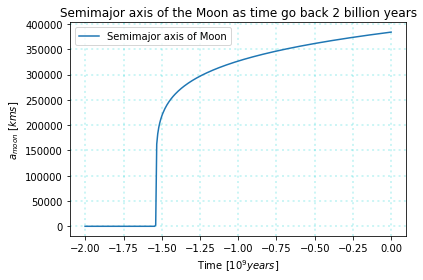

In [6]:
plt.plot(t/60/60/24/365/10**9, (sol[:,2]/m_m)**2 / (G*(M_e+m_m)) / 10**5, label='Semimajor axis of Moon')
#plt.plot(t, sol[:,0], label='L_e', color = 'limegreen')
#plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
#plt.plot(t, sol[:,1], label='S_e', color = 'royalblue')
#plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
#plt.plot(t, sol[:,2], label='L_m', color = 'tomato')
#plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.xlabel('Time [$10^{9} years$]')
plt.ylabel('$a_{moon}$ [$kms$]')
plt.title('Semimajor axis of the Moon as time go back 2 billion years')
plt.legend()
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.tight_layout()
plt.savefig("plot1.pdf", dpi=100)
plt.show()

In [7]:
# Determining at which index a_moon goes to zero
np.where((sol[:,2]/m_m)**2 / (G*(M_e+m_m)) < 1.0e-10)

(array([231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
        244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
        257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
        270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282,
        283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295,
        296, 297, 298, 299], dtype=int64),)

In [8]:
# Retriving how long ago the moon formed 
print('The moon formed',abs(t[230]/60/60/24/365/10**9), 'billion years ago')

The moon formed 1.5395152792413063 billion years ago


C:\Users\sinth\Python Stuff\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\sinth\Python Stuff\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in true_divide
  


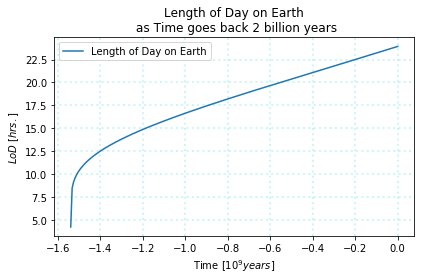

In [9]:
# Plotting the Length of Day on Earth vs. time
plt.plot(t/60/60/24/365/10**9, (86164*S_e0)/(sol[:,1]) / (3600), label='Length of Day on Earth')
plt.xlabel('Time [$10^{9} years$]')
plt.ylabel('$LoD$ [$hrs.$]')
plt.title('Length of Day on Earth'
          '\n as Time goes back 2 billion years')
plt.legend()
plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)
plt.tight_layout()
plt.savefig("plot2.pdf")
plt.show()

In [15]:
print('This is was the length of day when the Earth and Moon collided', (86164*S_e0)/(sol[:,1][229]) /3600, 'hrs.')

This is was the length of day when the Earth and Moon collided 8.500476393468487 hrs.


In [11]:
# Determining at which index the semimajor axis of the Moon is at the Roche Radius
#Roche Radius = 9492 km
np.where((sol[:,2]/m_m)**2 / (G*(M_e+m_m)) > 949200000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [12]:
# Retriving the Length of Day on Earth when the Moon was at the Roche Radius 
print('When the moon is at Roche Radius, the length of day on Earth is', (86164*S_e0)/(sol[:,1][229]) /3600, 'hrs.')

When the moon is at Roche Radius, the length of day on Earth is 8.500476393468487 hrs.


In [13]:
# Printing the age of the Moon and Earth
print('Age of Moon is 4.51 billion years')
print('Age of Earth is 4.54 billion years')

Age of Moon is 4.51 billion years
Age of Earth is 4.54 billion years
